In [48]:
!pip install ucimlrepo

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from ucimlrepo import fetch_ucirepo

#Датасет "Chess (King-Rook vs. King)"#

In [50]:
data = fetch_ucirepo(id=23)
print(data.metadata)

{'uci_id': 23, 'name': 'Chess (King-Rook vs. King)', 'repository_url': 'https://archive.ics.uci.edu/dataset/23/chess+king+rook+vs+king', 'data_url': 'https://archive.ics.uci.edu/static/public/23/data.csv', 'abstract': 'Chess Endgame Database for White King and Rook against Black King (KRK).', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 28056, 'num_features': 6, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['white-depth-of-win'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C57W2S', 'creators': ['Michael Bain', 'Arthur Hoff'], 'intro_paper': None, 'additional_info': {'summary': "An Inductive Logic Programming (ILP) or relational learning framework is assumed (Muggleton, 1992). The learning system is provided with examples of chess positions described only by the coordinates

In [51]:
df = data['data']['features']
df['target'] = data.data.targets

In [52]:
df.head(50)

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,target
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
5,a,1,c,2,c,3,draw
6,a,1,c,2,d,1,draw
7,a,1,c,2,d,2,draw
8,a,1,c,2,d,3,draw
9,a,1,c,3,c,2,draw


##Статическая информация о наборе данных##

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   white-king-file  28056 non-null  object
 1   white-king-rank  28056 non-null  int64 
 2   white-rook-file  28056 non-null  object
 3   white-rook-rank  28056 non-null  int64 
 4   black-king-file  28056 non-null  object
 5   black-king-rank  28056 non-null  int64 
 6   target           28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [54]:
print(df['target'].unique())

['draw' 'zero' 'one' 'two' 'three' 'four' 'five' 'six' 'seven' 'eight'
 'nine' 'ten' 'eleven' 'twelve' 'thirteen' 'fourteen' 'fifteen' 'sixteen']


In [55]:
df.describe()

,white-king-rank,white-rook-rank,black-king-rank
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


##Названия признаков##

In [56]:
df.columns

Index(['white-king-file', 'white-king-rank', 'white-rook-file',
       'white-rook-rank', 'black-king-file', 'black-king-rank', 'target'],
      dtype='object')

##Замена категориальных данных количественными##

In [57]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = pd.factorize(df[column])[0]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   white-king-file  28056 non-null  int64
 1   white-king-rank  28056 non-null  int64
 2   white-rook-file  28056 non-null  int64
 3   white-rook-rank  28056 non-null  int64
 4   black-king-file  28056 non-null  int64
 5   black-king-rank  28056 non-null  int64
 6   target           28056 non-null  int64
dtypes: int64(7)
memory usage: 1.5 MB


In [60]:
for column in df.columns:
  if df[column].isnull().any():
    df[column].fillna(df[column].mode()[0], inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   white-king-file  28056 non-null  int64
 1   white-king-rank  28056 non-null  int64
 2   white-rook-file  28056 non-null  int64
 3   white-rook-rank  28056 non-null  int64
 4   black-king-file  28056 non-null  int64
 5   black-king-rank  28056 non-null  int64
 6   target           28056 non-null  int64
dtypes: int64(7)
memory usage: 1.5 MB


In [62]:
df.head(50)

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,target
0,0,1,0,3,0,2,0
1,0,1,1,1,0,2,0
2,0,1,1,1,1,1,0
3,0,1,1,1,1,2,0
4,0,1,1,2,0,1,0
5,0,1,1,2,0,3,0
6,0,1,1,2,1,1,0
7,0,1,1,2,1,2,0
8,0,1,1,2,1,3,0
9,0,1,1,3,0,2,0


##Визуализация данных##

###Визуализация для каждого признака###

In [79]:
def vis(featureName):
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  df[featureName].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])

  sns.countplot(x=df[featureName], ax=axes[1])

  plt.tight_layout()

  plt.show()



def visNoPercent(featureName, threshold=1000):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    counts = df[featureName].value_counts()

    # Создание списка меток с учетом порога
    labels = []
    for value, count in counts.items():
        if count >= threshold:
            labels.append(value)  # Добавляем только название
        else:
            labels.append('')  # Для мелких секторов оставляем пустую метку

    counts.plot.pie(
        ax=axes[0],
        startangle=90,
        labels=labels,
        fontsize=12,
        legend=False
    )

    sns.countplot(x=df[featureName], ax=axes[1])

    plt.tight_layout()
    plt.show()

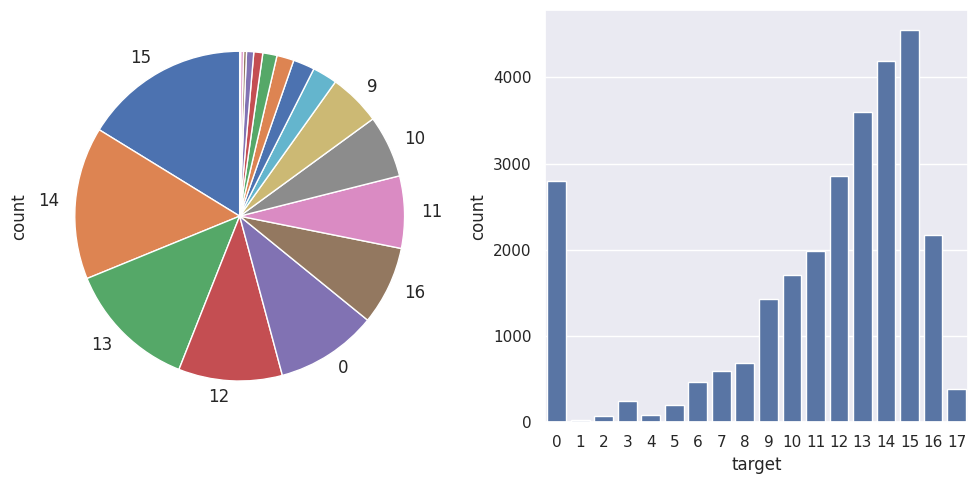

In [80]:
visNoPercent('target')

Целевой признак:  
0 - draw (ничья)  
1 - zero (выигрыш за 0 ходов в текущем ходе)  
2 - one (выигрыш за 1 ход)  
3 - two (выигрыш за 2 хода)  
4 - three (выигрыш за 3 хода)  
5 - four (выигрыш за 4 хода)  
6 - five (выигрыш за 5 ходов)  
7 - six (выигрыш за 6 ходов)  
8 - seven (выигрыш за 7 ходов)  
9 - eight (выигрыш за 8 ходов)  
10 - nine (выигрыш за 9 ходов)  
11 - ten (выигрыш за 10 ходов)  
12 - eleven (выигрыш за 11 ходов)  
13 - twelve (выигрыш за 12 ходов)  
14 - thirteen (выигрыш за 13 ходов)  
15 - fourteen (выигрыш за 14 ходов)  
16 - fifteen (выигрыш за 15 ходов)  
17 - sixteen (выигрыш за 16 ходов)

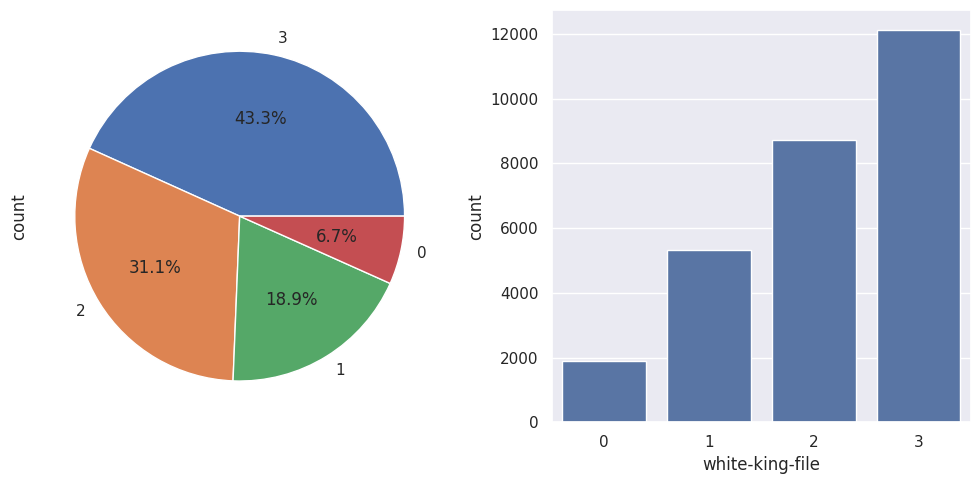

In [81]:
vis('white-king-file')

Вертикаль (столбец) положения белого короля на шахматной доске  
0 - a (король находится на вертикали "a")  
1 - b (король находится на вертикали "b")  
2 - c (король находится на вертикали "c")  
3 - d (король находится на вертикали "d")

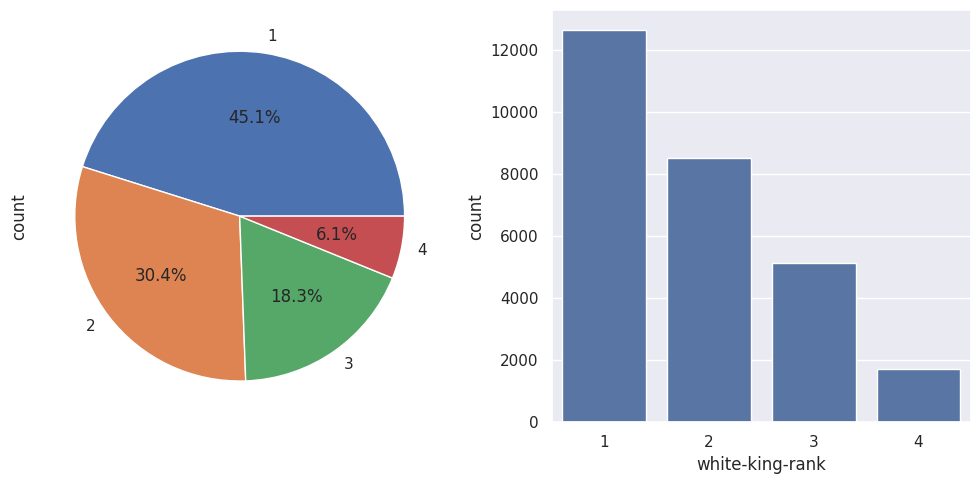

In [82]:
vis('white-king-rank')

Горизонталь (ряд) положения белого короля на шахматной доске  
1 (король находится на первой горизонтали)  
2 (король находится на второй горизонтали)  
3 (король находится на третьей горизонтали)  
4 (король находится на четвертой горизонтали)


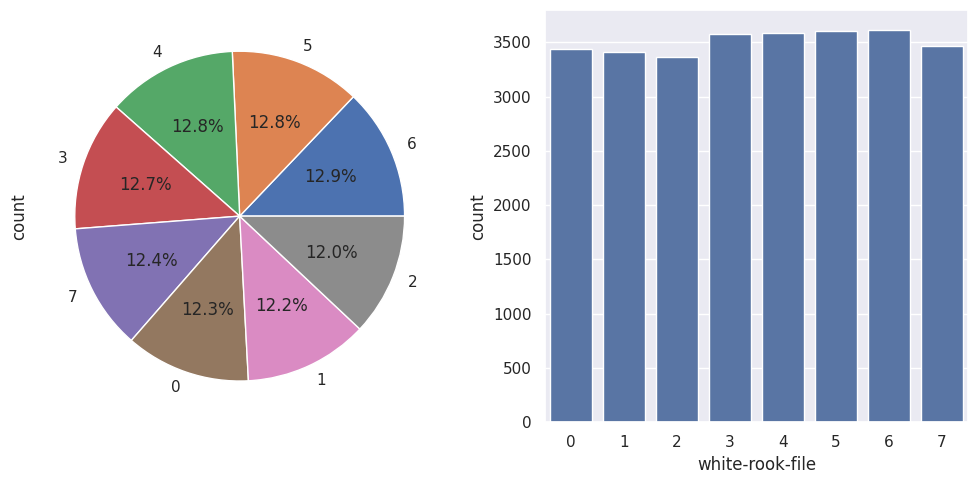

In [83]:
vis('white-rook-file')

Вертикаль (столбец) положения белой ладьи на шахматной доске  
0 - a (ладья находится на вертикали "a")  
1 - b (ладья находится на вертикали "b")  
2 - c (ладья находится на вертикали "c")  
3 - d (ладья находится на вертикали "d")  
4 - e (ладья находится на вертикали "e")  
5 - f (ладья находится на вертикали "f")  
6 - g (ладья находится на вертикали "g")  
7 - h (ладья находится на вертикали "h")

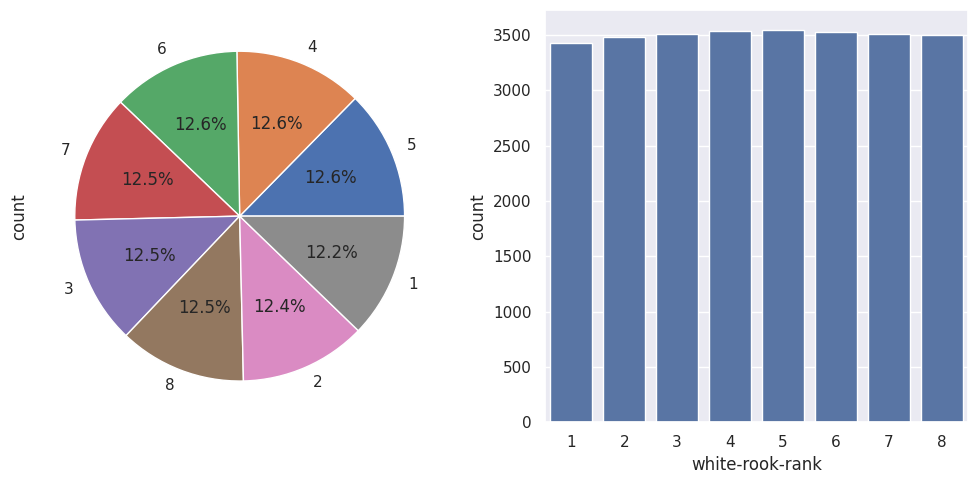

In [84]:
vis('white-rook-rank')

Горизонталь (ряд) положения белой ладьи на шахматной доске  
1 (ладья находится на первой горизонтали)  
2 (ладья находится на второй горизонтали)  
3 (ладья находится на третьей горизонтали)  
4 (ладья находится на четвертой горизонтали)  
5 (ладья находится на пятой горизонтали)  
6 (ладья находится на шестой горизонтали)  
7 (ладья находится на седьмой горизонтали)  
8 (ладья находится на восьмой горизонтали)


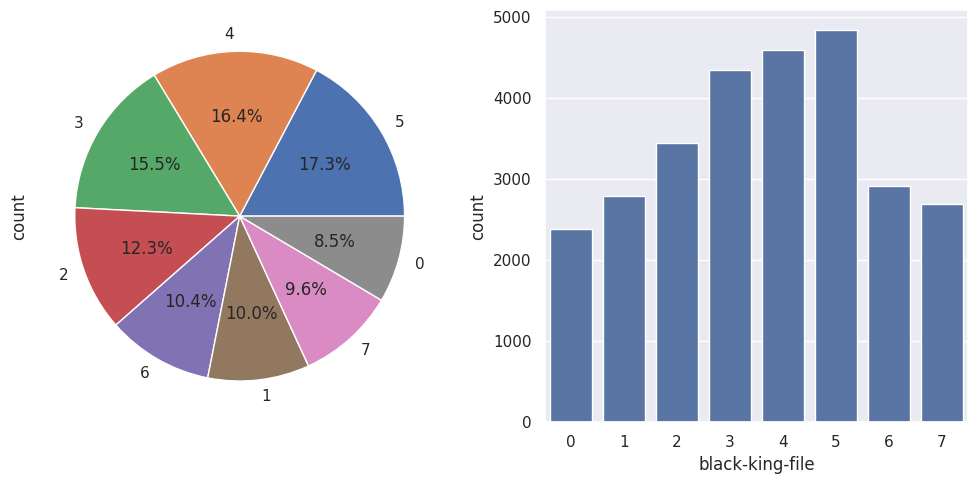

In [85]:
vis('black-king-file')

Вертикаль (столбец) положения черного короля на шахматной доске  
0 - a (король находится на вертикали "a")  
1 - b (король находится на вертикали "b")  
2 - c (король находится на вертикали "c")  
3 - d (король находится на вертикали "d")  
4 - e (король находится на вертикали "e")  
5 - f (король находится на вертикали "f")  
6 - g (король находится на вертикали "g")  
7 - h (король находится на вертикали "h")

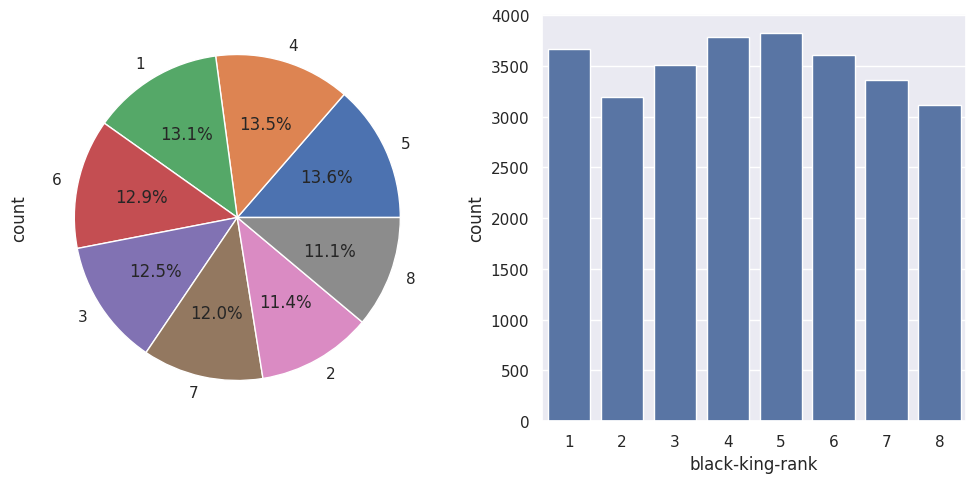

In [86]:
vis('black-king-rank')

Горизонталь (ряд) положения черного короля на шахматной доске  
1 (король находится на первой горизонтали)  
2 (король находится на второй горизонтали)  
3 (король находится на третьей горизонтали)  
4 (король находится на четвертой горизонтали)  
5 (король находится на пятой горизонтали)  
6 (король находится на шестой горизонтали)  
7 (король находится на седьмой горизонтали)  
8 (король находится на восьмой горизонтали)

###Групповые визуализации###

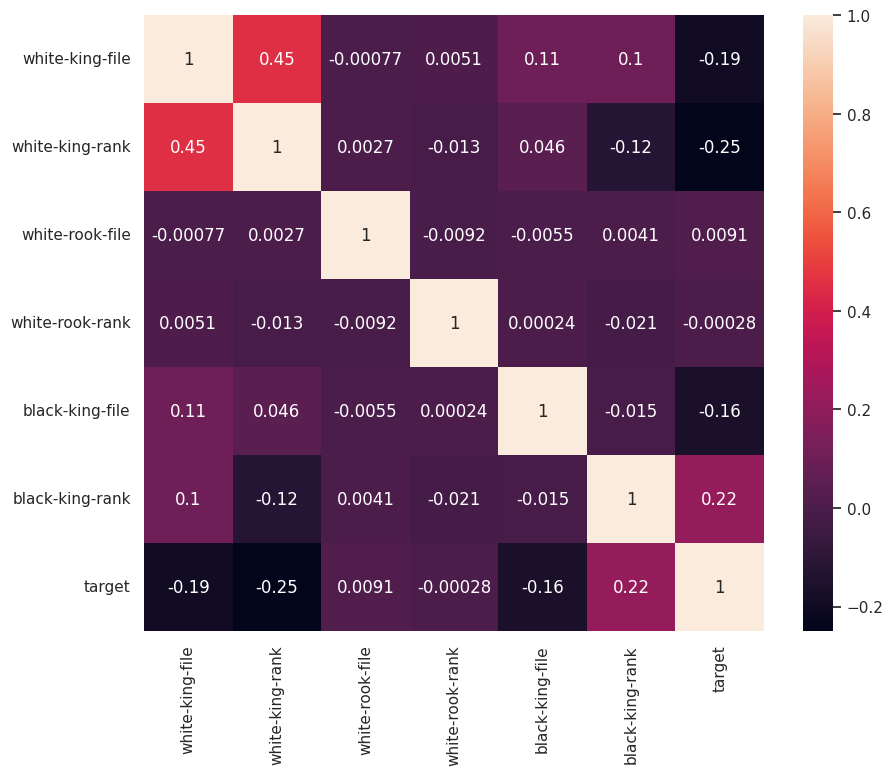

In [87]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.show()

Из данного графика можно сделать вывод о том, что самыми влиятельными признаками оказались: black-king-rank, white-rook-file.  
Так же видна сильная зависимость между признаками white-king-rank и white-king-file.

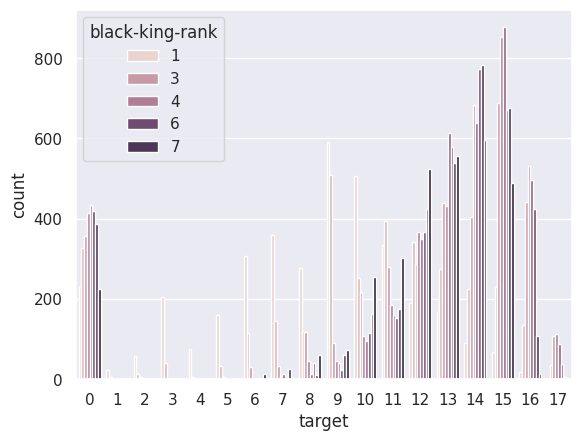

In [88]:
sns.countplot(data=df, x="target", hue='black-king-rank');

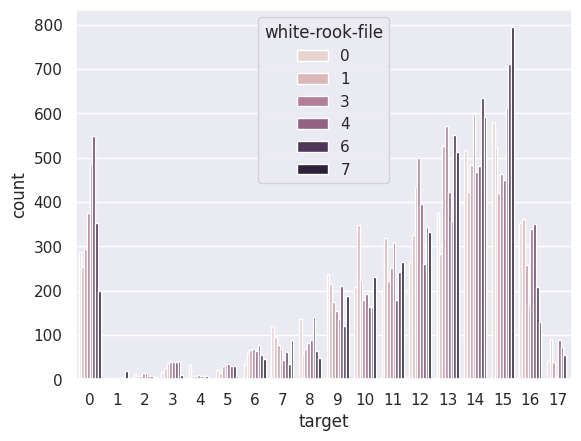

In [90]:
sns.countplot(data=df, x="target", hue='white-rook-file');

<Axes: xlabel='white-king-rank', ylabel='count'>

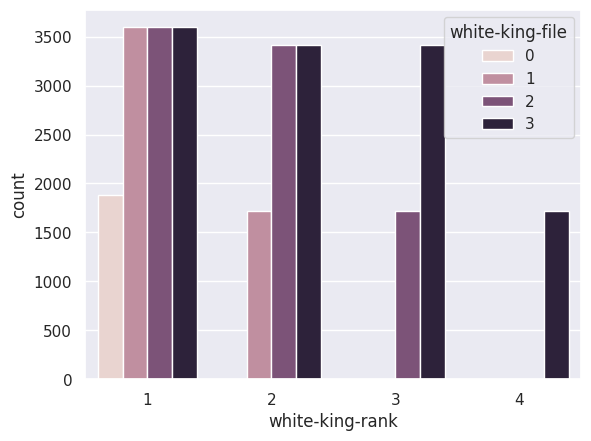

In [91]:
sns.countplot(data=df, x="white-king-rank", hue='white-king-file')